### Gráfico de dispersión (scatter plot)
Muestra la relación entre dos variables numéricas.

- Detectar correlaciones
- Identificar patrones o tendencias
- Detectar valores atípicos (outliers)
- Comparar distribuciones conjuntas

##### Encuesta de mejores trabajos Stack Overflow 2025
[Dataset (fuente: Stack Overflow)](https://survey.stackoverflow.co/2025)


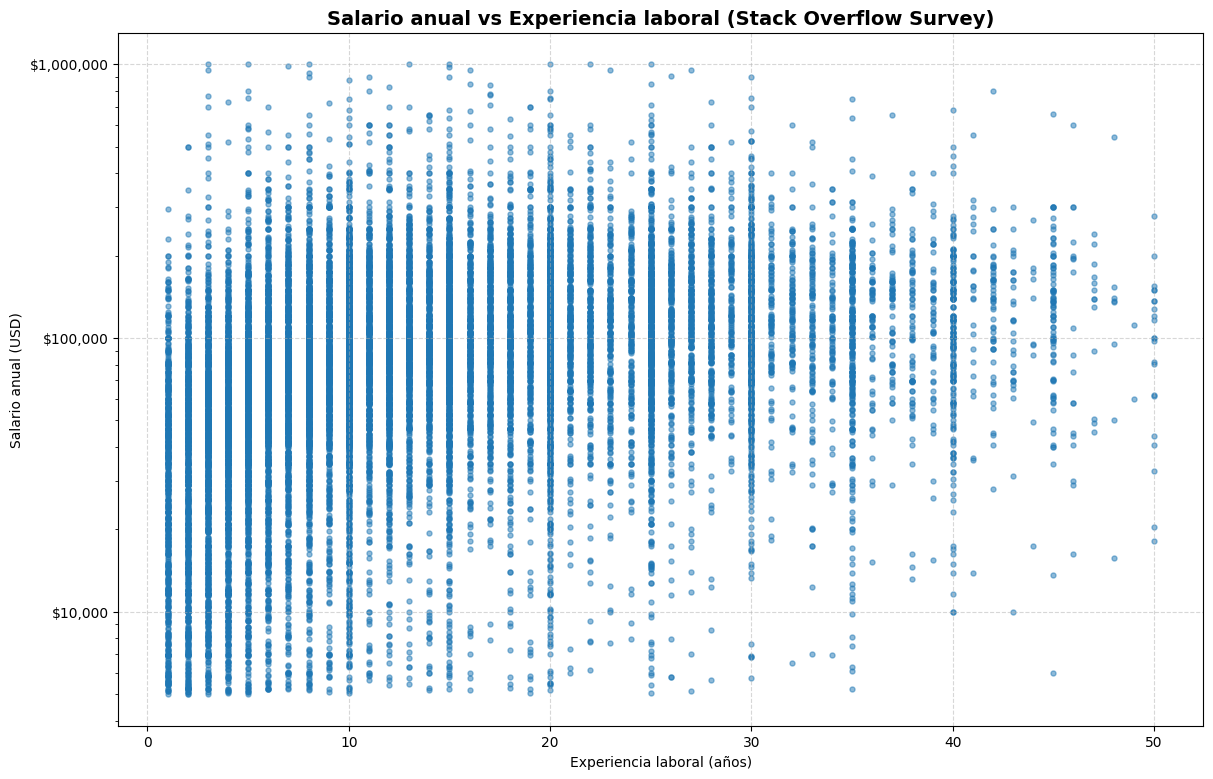

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#! Cargar datos (ya lo tienes)
df = pd.read_csv('data/stack_overflow.csv', usecols=["ConvertedCompYearly", "WorkExp"])

#pd.set_option('display.max_columns', None)
#print(df.columns.tolist())

#! Eliminar filas con valores faltantes
df_clean = df.dropna()

#! Eliminar outliers
df_clean = df_clean[
    (df_clean['ConvertedCompYearly'] <= 1_000_000) & (df_clean['ConvertedCompYearly'] > 5_000) & (df_clean['WorkExp'] <= 50)
]

#! Gráfico de dispersión 
plt.figure(figsize=(14, 9))
plt.scatter(
    df_clean['WorkExp'],
    df_clean['ConvertedCompYearly'],
    alpha=0.5,        #! transparencia para ver densidad
    s=13,             #! tamaño de los puntos
    color='#1f77b4'   
)

plt.title("Salario anual vs Experiencia laboral (Stack Overflow Survey)", fontsize=14, weight='bold')
plt.xlabel("Experiencia laboral (años)")
plt.ylabel("Salario anual (USD)")

#! Usar escala logarítmica en Y (¡muy recomendado para salarios!)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)

#! Formato del eje Y: mostrar $10k, $100k, etc.
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()




- Eje X: Experiencia laboral (de 0 a 50 años).
- Eje Y: Salario anual en USD (escala logarítmica: desde $5,000 hasta $1,000,000).
- Puntos azules: Cada punto representa una persona con su experiencia y salario correspondiente.

Relación general:
- Hay una tendencia positiva débil: a medida que aumenta la experiencia, tiende a aumentar el salario. Pero no es lineal ni fuerte → hay mucha variabilidad en los salarios para cada nivel de experiencia.

Densidad de puntos:
- En los primeros años (0–10), hay muchos puntos concentrados en rangos bajos de salario ($30,000–$80,000).
- Entre 10 y 20 años, los salarios se expanden hacia arriba (hasta $200,000+), pero también hay muchos puntos en rangos medios.
- A partir de 20 años, los salarios siguen subiendo, pero con mucha dispersión: algunos ganan poco, otros mucho.

Outliers (valores extremos):
- Hay varios puntos muy altos en el eje Y:
- Algunas personas con poca experiencia (5–10 años) ganan más de $500,000.
- Otras con mucha experiencia (30+ años) también alcanzan salarios altos ($500,000–$1M).
- También hay puntos muy bajos: personas con 20+ años de experiencia ganando menos de $20,000.

Forma de la nube de puntos:
- La nube no tiene forma clara de "banda" ascendente → sugiere que la experiencia no es el único factor que determina el salario.
- Factores como ubicación geográfica, industria, lenguajes/tecnologías usadas, nivel de puesto (junior/senior/gerente), o incluso negociación salarial, probablemente influyen más.

Escala logarítmica en Y:
- El eje Y está en escala logarítmica (cada paso representa un múltiplo de 10: $10k, $100k, $1M).
- Esto permite visualizar mejor la amplia gama de salarios, desde entry-level hasta ejecutivos o freelancers de alto nivel.